This Notebook uses simple unit tests to check the correctness of your code.

Make sure the tests for each cell pass before continuing to the next because some tests rely on state created in previous cells. 

If you find it difficult to debug a particular step try to **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All), just to clear any previously stored data.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

You must delete `raise NotImplementedError()` when you implement each solution.

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# For unit testing answers.
from unittest.mock import patch, Mock

## Reading the data

Read in the data from the csv file `transport-survey.csv`.

Correctly assign the index column and the correct data types for each variable.

- hint: You can do this entirely by specifying `index_col` and `dtype` parameters to `read_csv`, or manually reassigning values after loading the data frame.

In [3]:
# YOUR CODE HERE

df = pd.read_csv('./transport-survey.csv', index_col = 0,
                 dtype = {'gender' : 'category',
                        'transport' : 'category',
                        'enjoyment' : pd.CategoricalDtype(
                        categories = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree'],
                                        ordered = True)})

df

,gender,transport,num_journeys,journey_time,enjoyment
0,male,bus,1,23.0,agree
1,male,bus,3,19.0,agree
2,male,bus,2,19.0,disagree
3,female,bus,5,19.0,agree
4,female,bus,4,25.0,disagree
...,...,...,...,...,...
195,female,bus,1,27.0,neutral
196,female,walk,3,10.0,neutral
197,female,bus,4,20.0,neutral
198,male,walk,2,19.0,agree


In [4]:
# Check we have created a DataFrame.
assert type(df) is pd.DataFrame
# Basic sanity check that we are loading the correct data.
assert df.ndim == 2
assert df.shape == (200, 5)
# Check dtypes.
assert df['gender'].dtype == 'category'
assert len(df['gender'].dtype.categories.symmetric_difference(
    ['female', 'male', 'nonbinary', 'trans']))  == 0
assert df['gender'].dtype.ordered == False
assert df['transport'].dtype == 'category'
assert df['transport'].dtype.ordered == False
assert len(df['transport'].dtype.categories.symmetric_difference(
    ['bus', 'car', 'train', 'walk']))  == 0
assert df['num_journeys'].dtype == 'int64'
assert df['journey_time'].dtype == 'float64'
assert df['enjoyment'].dtype == 'category'
assert df['enjoyment'].dtype.ordered == True
assert df['enjoyment'].dtype.categories.equals(
    pd.Index(['strongly disagree', 'disagree', 'neutral','agree', 'strongly agree'])
)

## Missing values

Generate a table summarising the number of missing values for each variable using the `DataFrame.isna()` and `DataFrame.sum()` methods. 

Save the table in the variable `na_summary`.

In [5]:
# YOUR CODE HERE

na_summary = df.isna().sum()

na_summary

gender          8
transport       0
num_journeys    0
journey_time    0
enjoyment       0
dtype: int64

In [6]:
assert type(na_summary) is pd.Series
assert na_summary.index.equals(df.columns)
assert na_summary.equals(pd.Series([8, 0, 0 ,0, 0], index=df.columns))

## Summary tables

Create a summary table of the ***categorical*** variables in this DataFrame using `DataFrame.describe()`.

Save the table in a variable called `cat_summary`.

In [11]:
# YOUR CODE HERE

cat_summary = df.describe(include=['category'])

cat_summary

,gender,transport,enjoyment
count,192,200,200
unique,4,4,5
top,female,train,neutral
freq,102,85,64


In [12]:
assert type(cat_summary) is pd.DataFrame
assert len(cat_summary.columns.symmetric_difference(['gender', 'transport', 'enjoyment'])) == 0
assert cat_summary.index.equals(pd.Index(['count', 'unique', 'top', 'freq']))
assert np.all(np.equal(cat_summary.loc['top'], ['female', 'train', 'neutral']))
assert np.all(np.equal(cat_summary.loc['freq'], [102, 85, 64]))

Create a summary table of the ***numerical*** variables in this DataFrame using `DataFrame.describe()`, ***rounded to two decimal places***.

Save the table in a variable called `num_summary`.

In [33]:
# YOUR CODE HERE

num_summary = df.describe(include = [None]).round(2)

num_summary

,journey_time
count,200.00
mean,28.12
std,12.87
min,6.00
25%,17.00
50%,25.00
75%,39.00
max,57.00


In [35]:
assert type(num_summary) is pd.DataFrame
assert len(num_summary.columns.symmetric_difference(['num_journeys', 'journey_time'])) == 0
assert num_summary.index.equals(pd.Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']))
assert np.all(np.equal(num_summary.loc['mean', ['num_journeys', 'journey_time']], [3.21, 28.12]))
assert np.all(np.equal(num_summary.loc['std', ['num_journeys', 'journey_time']], [1.38, 12.87]))
assert np.all(np.equal(num_summary.loc['50%', ['num_journeys', 'journey_time']], [3.50, 25.00]))

AssertionError: 

## Gender

Generate a horizontal bar chart of gender frequency counts by implementing the function `plot_gender_barh`.

![gender bar](img/gender-bar.png)

We ususally wouldn't define a function to produce a simple plot like this, but we need to here for the purpose of unit testing.

- the frequency counts should be sorted according to the default sort order (descending)
- use the pandas.plot API to generate the basic plot and retrun an `Axes` object
- customise the plot using the `Axes` methods
    - invery the y-axis so that the highest category is at the top if the plot
    - set the x-axis label to 'frequency'
    - set the y-axis label to 'gender'
    - set the title to 'Survey respondents: Gender'
- ensure you return the `Axes` object for unit testing

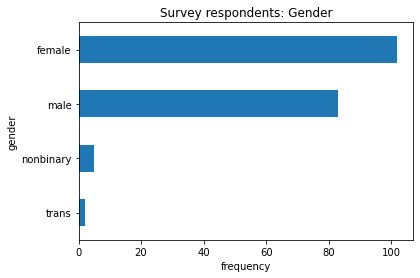

In [37]:
def plot_gender_barh():
    
    ax = df['gender'].value_counts().plot.barh()
    
    
    ax.invert_yaxis()
    ax.set_xlabel('frequency')
    ax.set_ylabel('gender')
    ax.set_title('Survey respondents: Gender')

    # Return the Axes object for unit testing.
    return ax

gender_barh_ax = plot_gender_barh()
plt.show()

In [38]:
with patch('pandas.Series.value_counts') as mock_value_counts:
    plot_gender_barh()
mock_value_counts.assert_called_once_with()

with patch('pandas.Series.plot.barh') as mock_barh:
    ax = plot_gender_barh()
mock_barh.assert_called_once_with()
ax.invert_yaxis.assert_called_once_with()

# Test y labels are correct.
y_tick_text = [ticklabel.get_text() for ticklabel in gender_barh_ax.yaxis.get_ticklabels()]
assert y_tick_text == ['female', 'male', 'nonbinary', 'trans']

# Test axes labels.
assert gender_barh_ax.xaxis.get_label_text() == 'frequency'
assert gender_barh_ax.yaxis.get_label_text() == 'gender'

Generate a pie chart of gender frequency counts by implementing the function `plot_gender_pie`.

![gender pie](img/gender-pie.png)

We ususally wouldn't define a function to produce a simple plot like this, but we need to here for the purpose of unit testing.

- the frequency counts should be sorted according to the default sort order (descending)

Pie charts often need customising to communicate effectively. Customise this plot by providing parameters to the `pandas.plot.pie` method.

- add percent labels to zero decimal places using the format string '%1.0f%%'
- place the largest category across the top of the plot by specifying a start angle of 180 degrees
- draw the pie chart clockwise in direction
- set the label to an empty string
- set the title to 'Survey respondents: Gender'
- add a table summarising the frequency of each category

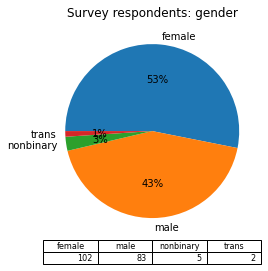

In [40]:
def plot_gender_pie():
    # YOUR CODE HERE
    ax = df['gender'].value_counts().plot.pie(autopct='%1.0f%%',
                                              startangle=180,
                                              counterclock=False,
                                              label='',
                                              title = 'Survey respondents: gender',
                                              table = True)
    
    # No need to return anything here.

plot_gender_pie()
plt.show()

In [41]:
with patch('pandas.Series.plot.pie') as mock_pie:
    plot_gender_pie()
mock_pie.assert_called_once_with(autopct='%1.0f%%',
                                 startangle=180,
                                 counterclock=False,
                                 label='',
                                 title='Survey respondents: Gender',
                                 table=True)

AssertionError: expected call not found.
Expected: pie(autopct='%1.0f%%', startangle=180, counterclock=False, label='', title='Survey respondents: Gender', table=True)
Actual: pie(autopct='%1.0f%%', startangle=180, counterclock=False, label='', title='Survey respondents: gender', table=True)

## Transport

Now generate a bar and/or pie chart of `transport` ("Most common mode of transport taken to university").

There are no marks for this because it's basically the same as visualising the frequency counts of `gender`!

In [42]:
# Most common mode of transport taken to university

## Number of journeys

Complete the following text description of the number of journeys taken each week by providing the arguments to the format function.

You need to generate the correct values by calling the approprate pandas methods.

- hint: mode returns an array (as there may be more than a single mode), therefore you will need to extract the first value

In [43]:
num_journey_info = (
    'The typical number of journeys taken each week to university ranges from {min} to {max}. '
    'The most common number of journeys taken each week is {mode}. '
    'However, the mean number of journeys taken each week is {mean}, '
    'indicating that the distribtion may be negatively-skewed.'
)

In [44]:
def format_num_journey_info():
    return num_journey_info.format(
        # Provide a key=value for each format parameter.
        # Do not hard-code numbers, call the appropriate pandas methods.
        # YOUR CODE HERE
        
    )

print(format_num_journey_info())

SyntaxError: invalid syntax (<ipython-input-44-e77e7a56ad13>, line 6)

In [ ]:
with patch('pandas.Series.min') as mock_min:
    format_num_journey_info()
mock_min.assert_called_once_with()

with patch('pandas.Series.max') as mock_max:
    format_num_journey_info()
mock_max.assert_called_once_with()

with patch('pandas.Series.mode') as mock_mode:
    format_num_journey_info()
mock_mode.assert_called_once_with()

with patch('pandas.Series.mean') as mock_mean:
    format_num_journey_info()
mock_mean.assert_called_once_with()

assert format_num_journey_info() == 'The typical number of journeys taken each week to university ranges from 1 to 5. The most common number of journeys taken each week is 4. However, the mean number of journeys taken each week is 3.21, indicating that the distribtion may be negatively-skewed.'

Implement the function `num_journeys_skew` to return the skewness statistic of the `num_journeys` variable, rounded to two decimal places.

In [ ]:
def num_journeys_skew():
    # return ...
    # YOUR CODE HERE
    raise NotImplementedError()
    
num_journeys_skew()

In [ ]:
with patch('pandas.Series.skew') as mock_skew:
    num_journeys_skew()
mock_skew.assert_called_once_with()

assert num_journeys_skew() == -0.24

Create a (vertical) bar chart of the frequency counts of `num_journeys`. As this variable is a discrete numerical variable with a small number of values we can simply count the frequecny of each value (as opposed to a continuous numerical variable where we would need to use a histogram).

![number of journeys bar](img/num-journeys-bar.png)

We ususally wouldn't define a function to produce a simple plot like this, but we need to here for the purpose of unit testing.

- do not sort the values by frequency
- rotate the x-axis tick labes so that they are more readable
- customise the plot using the `Axes` methods
    - set the x-axis label to: 'number of journeys'
    - set the y-axis label to: 'frequency'
    - set the title to: 'Typical number of journeys taken to university each week'
- return the `Axis` object for unit testing

NameError: name 'x_tick_text' is not defined

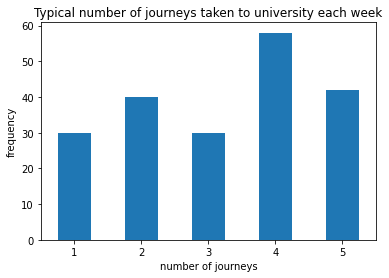

In [56]:
def plot_num_journeys_bar():
    # YOUR CODE HERE
    ax = df['num_journeys'].value_counts(sort=False).plot.bar(rot=0)
    
    ax.set_xlabel('number of journeys')
    ax.set_ylabel('frequency')
    ax.set_title('Typical number of journeys taken to university each week')
    x_tick_text == [1, 2, 3, 4, 5]
    
    # Return the Axes object for unit testing.
    return ax

num_journeys_bar_ax = plot_num_journeys_bar()
plt.show()

In [48]:
with patch('pandas.Series.value_counts') as mock_value_counts:
    plot_num_journeys_bar()
mock_value_counts.assert_called_once_with(sort=False)

with patch('pandas.Series.plot.bar') as mock_bar:
    ax = plot_num_journeys_bar()
mock_bar.assert_called_once_with(rot=0)

# Test y labels are correct.
x_tick_text = [ticklabel.get_text() for ticklabel in num_journeys_bar_ax.xaxis.get_ticklabels()]
assert x_tick_text == ['1', '2', '3', '4', '5']

# Test axes labels.
assert num_journeys_bar_ax.xaxis.get_label_text() == 'number of journeys'
assert num_journeys_bar_ax.yaxis.get_label_text() == 'frequency'
assert num_journeys_bar_ax.get_title() == 'Typical number of journeys taken to university each week'

NameError: name 'x_tick_text' is not defined

Create a box plot of the distribution of `num_journeys`.

![number of journeys box](img/num-journeys-box.png)

We ususally wouldn't define a function to produce a simple plot like this, but we need to here for the purpose of unit testing.

- customise the plot using the `Axes` methods
    - set the y-axis label to: 'number of journeys'
    - set the title to: 'Typical number of journeys taken to university each week'
- return the `Axis` object for unit testing

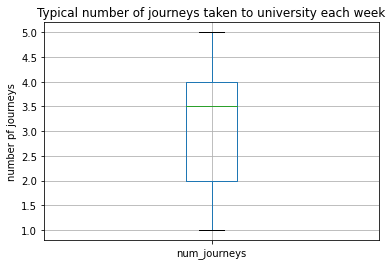

In [54]:
def plot_num_journeys_box():
    # YOUR CODE HERE
    
    ax = df.boxplot(column=['num_journeys'])
    ax.set_ylabel('number pf journeys')
    ax.set_title('Typical number of journeys taken to university each week')
    
    # Return the Axes object for unit testing.
    return ax

num_journeys_box_ax = plot_num_journeys_box()
plt.show()

AssertionError: Expected 'box' to be called once. Called 0 times.

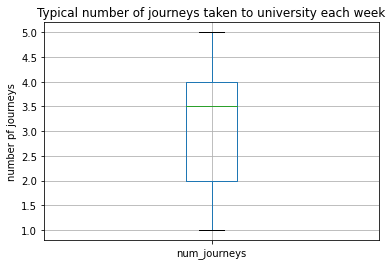

In [55]:
with patch('pandas.Series.plot.box') as mock_box:
    ax = plot_num_journeys_box()
mock_box.assert_called_once_with()

# Test axes labels.
assert num_journeys_box_ax.yaxis.get_label_text() == 'number of journeys'
assert num_journeys_box_ax.get_title() == 'Typical number of journeys taken to university each week'

## Journey time

Create a histogram of the distribution of `journey_time`.

![journey time hist](img/journey-time-hist.png)

We ususally wouldn't define a function to produce a simple plot like this, but we need to here for the purpose of unit testing.

- set the histogram bins to 5 minute intervals (from 5 to 60)
- customise the plot using the `Axes` methods
    - set the x-axis label to: 'journey time (minutes)'
    - set the y-axis label to: 'frequency'
    - set the title to: 'Distribution of journey time to university each week'
- return the `Axis` object for unit testing

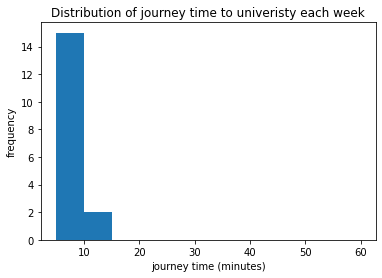

In [57]:
def plot_journey_time_hist():
    
    ax = df['journey_time'].value_counts().plot.hist(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
    ax.set_xlabel('journey time (minutes)')
    ax.set_ylabel('frequency')
    ax.set_title('Distribution of journey time to univeristy each week')
    
    
    # Return the Axes object for unit testing.
    return ax

journey_time_hist_ax = plot_journey_time_hist()
plt.show()

In [58]:
with patch('pandas.Series.plot.hist') as mock_hist:
    ax = plot_journey_time_hist()
mock_hist.assert_called()

def test_bins(bins):
    _bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
    if type(bins) is np.ndarray:
        if len(bins) == len(_bins):
            return (bins == _bins).all()
        else:
            return False
    else:
        return bins == _bins

assert test_bins(mock_hist.call_args_list[0][1]['bins'])

# Test axes labels.
assert journey_time_hist_ax.yaxis.get_label_text() == 'frequency'
assert journey_time_hist_ax.get_title() == 'Distribution of journey time to university each week'

AssertionError: 